In [16]:
pip install diagnostics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
from torch import nn, optim

from torchvision import datasets, transforms, models
import os
import numpy as np
from PIL import Image
import pandas as pd
import dask.bag as bag
from diagnostics import exception_hook


In [5]:
AceneDir="/content/drive/MyDrive/monkeyFox/Acne"
Melanoma="/content/drive/MyDrive/monkeyFox/Melanoma"
MonkeyFox="/content/drive/MyDrive/monkeyFox/Monkeypox"
NormalSkin="/content/drive/MyDrive/monkeyFox/Normal skin"
Other= "/content/drive/MyDrive/monkeyFox/Cyst, tumour and skin-tags"

In [6]:
number_classes = {
'Acene': len(os.listdir(AceneDir)),
'Melanoma': len(os.listdir(Melanoma)),
'MonkeyFox': len(os.listdir(MonkeyFox)),
'NormalSkin': len(os.listdir(NormalSkin)),
'Other': len(os.listdir(Other))
}

In [21]:
number_classes

{'Acene': 400,
 'Melanoma': 600,
 'MonkeyFox': 700,
 'NormalSkin': 700,
 'Other': 600}

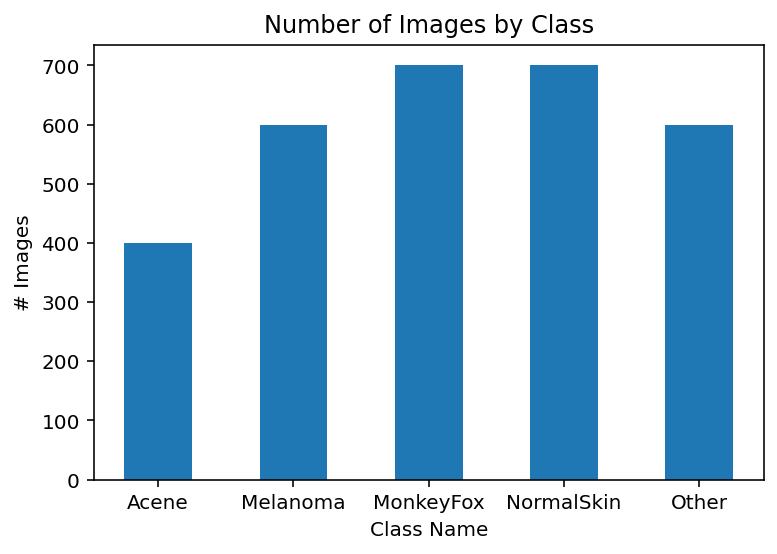

In [7]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

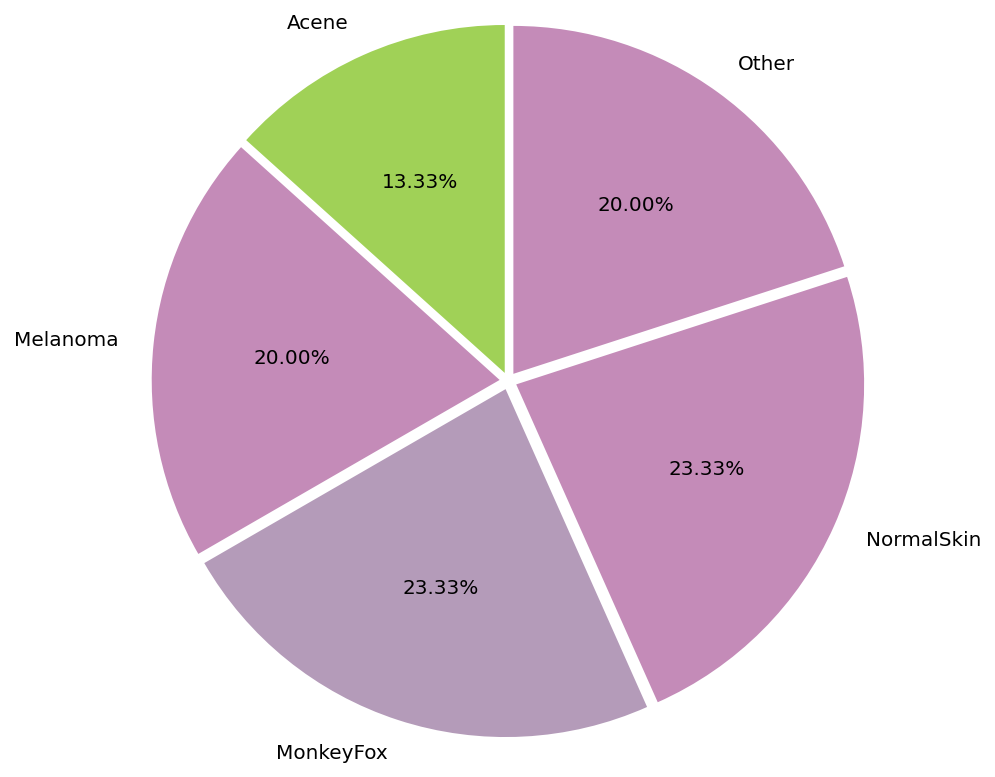

In [27]:
colors = ['#a0d157','#c48bb8', '#b49bb9','#c48bb8','#c48bb8' ]
plt.pie([400,600,700,700,600 ],startangle=90,explode=[0.05,0.05, 0.05,0.05,0.05],autopct='%0.2f%%',
        labels=['Acene', 'Melanoma', "MonkeyFox", "NormalSkin", "Other"], colors= colors,radius=2)
plt.show()

In [ ]:
# /content/drive/MyDrive/monkeyFox

In [11]:
directories = {
'Acene': AceneDir,
'Melanoma': Melanoma,
'MonkeyFox': MonkeyFox,
'NormalSkin': NormalSkin,
'Other': Other
}

def get_dims(file):
# Returns dimenstions for an RBG image
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

In [35]:
import diagnostics

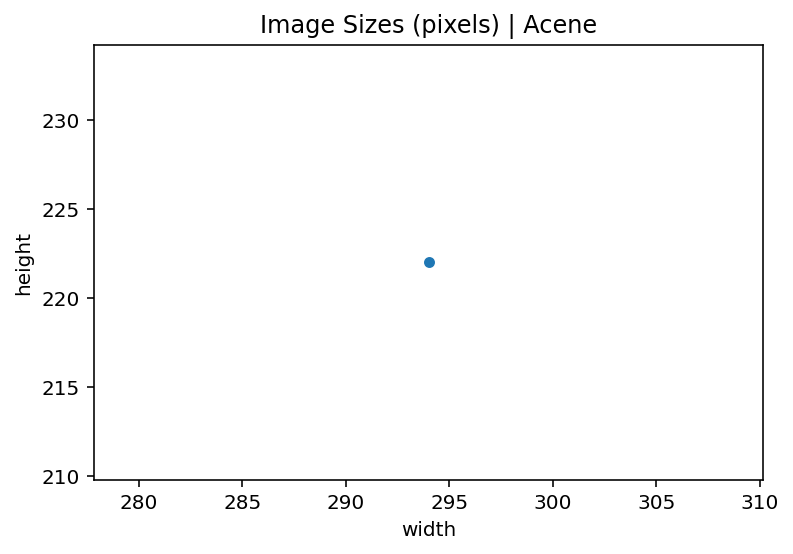

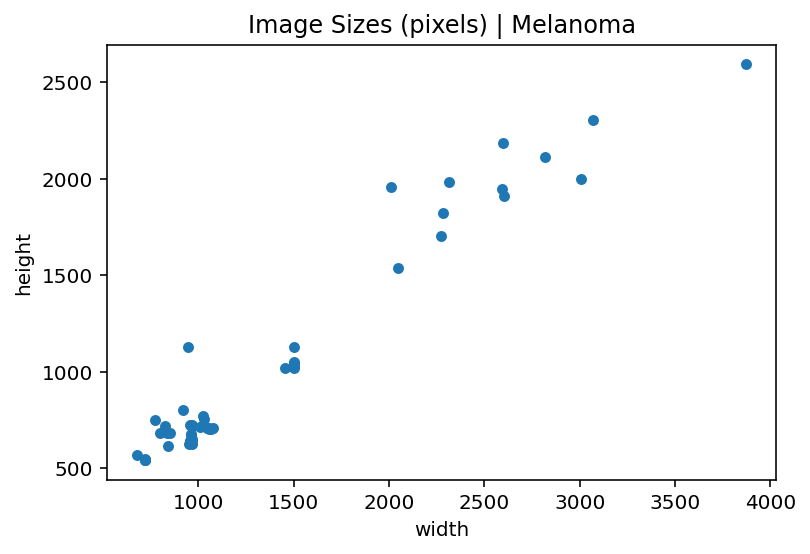

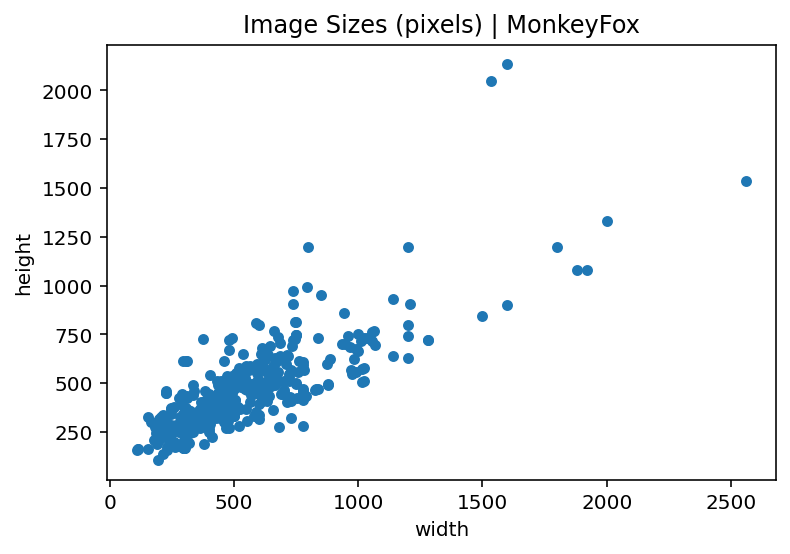

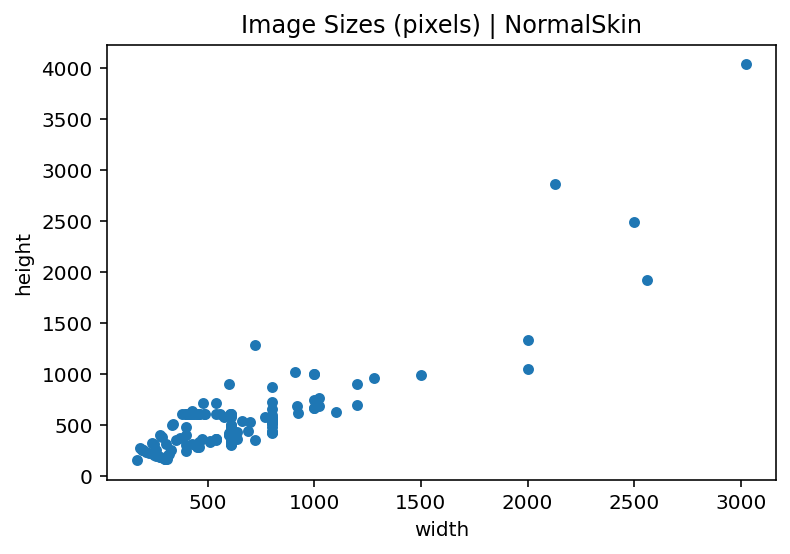

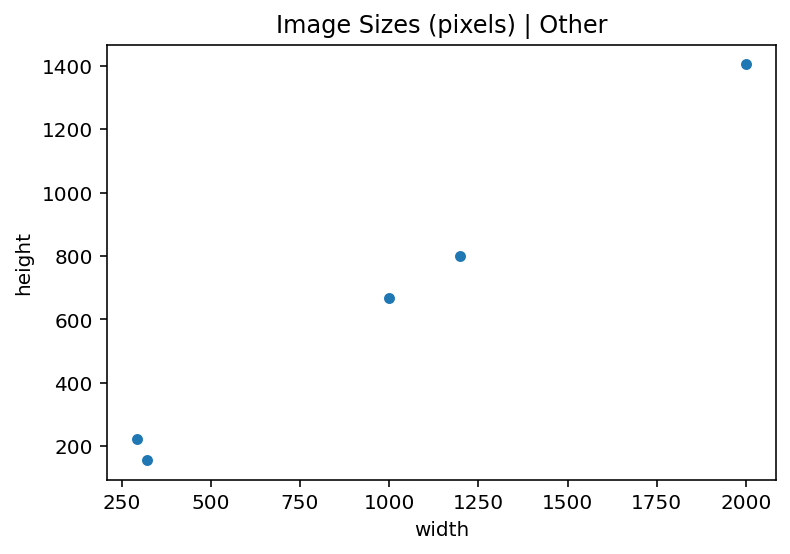

In [34]:
for n,d in directories.items():
  filepath = d
  filelist = [filepath + "/"+ f for f in os.listdir(filepath)]
  dims = bag.from_sequence(filelist).map(get_dims)
  # with diagnostics.ProgressBar():
  dims = dims.compute()
  dim_df = pd.DataFrame(dims, columns=['height', 'width'])
  sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
  sizes.plot.scatter(x='width', y='height');
  plt.title('Image Sizes (pixels) | {}'.format(n))

In [48]:
def show_img(n,d):
  nrows = 4
  ncols = 4
  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  filepath = d

  for i, f in enumerate(os.listdir(filepath)[:8]):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(filepath + "/"+ f)
    plt.imshow(img)
  plt.show()


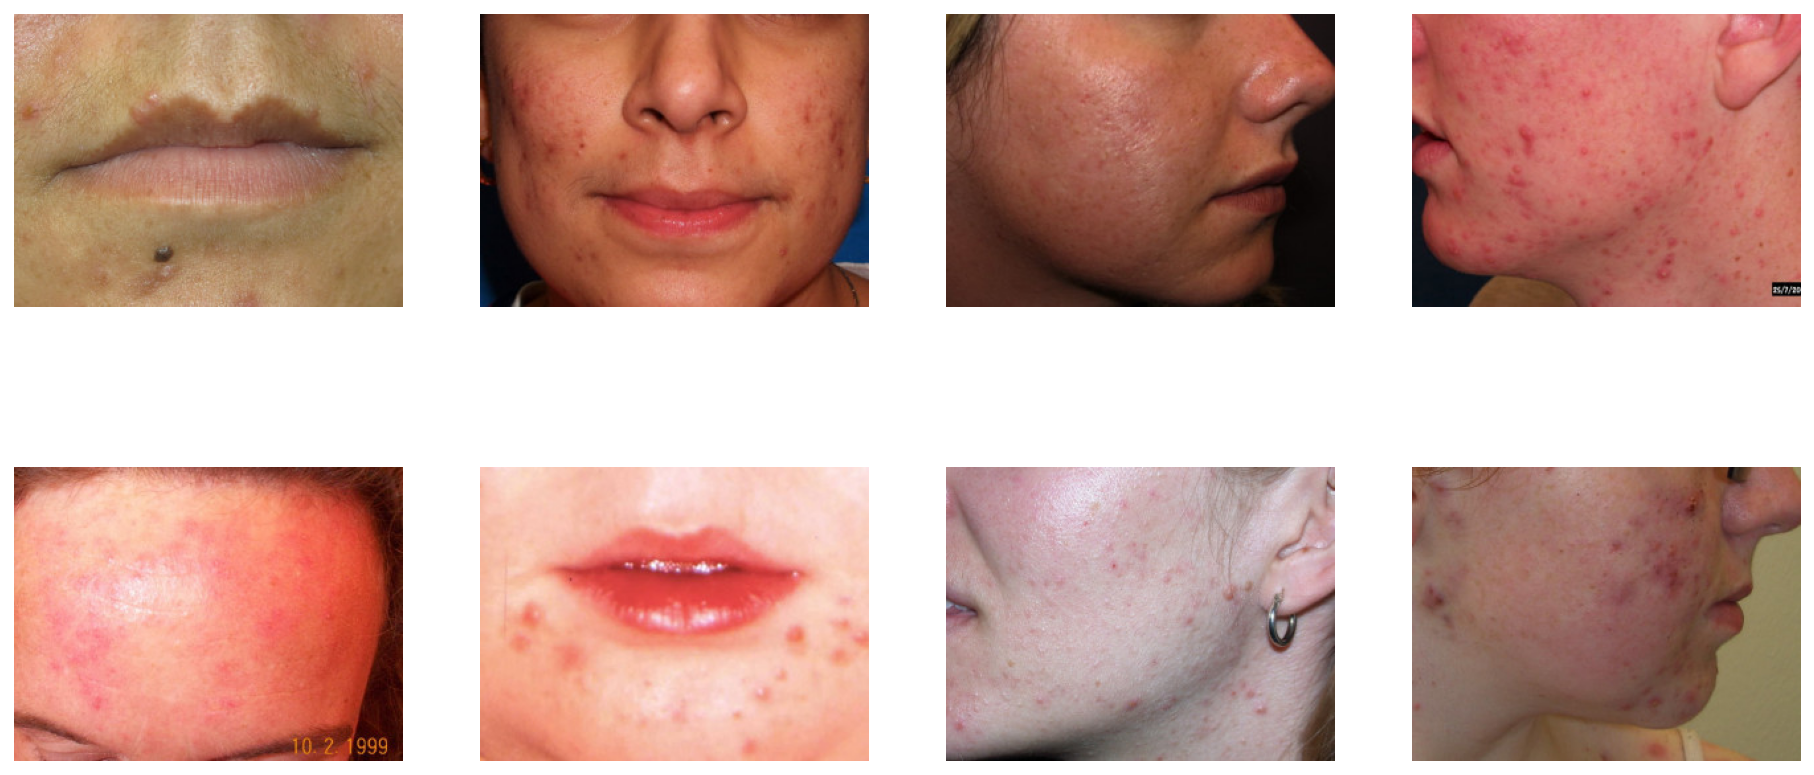

In [49]:
show_img("Acene",AceneDir)

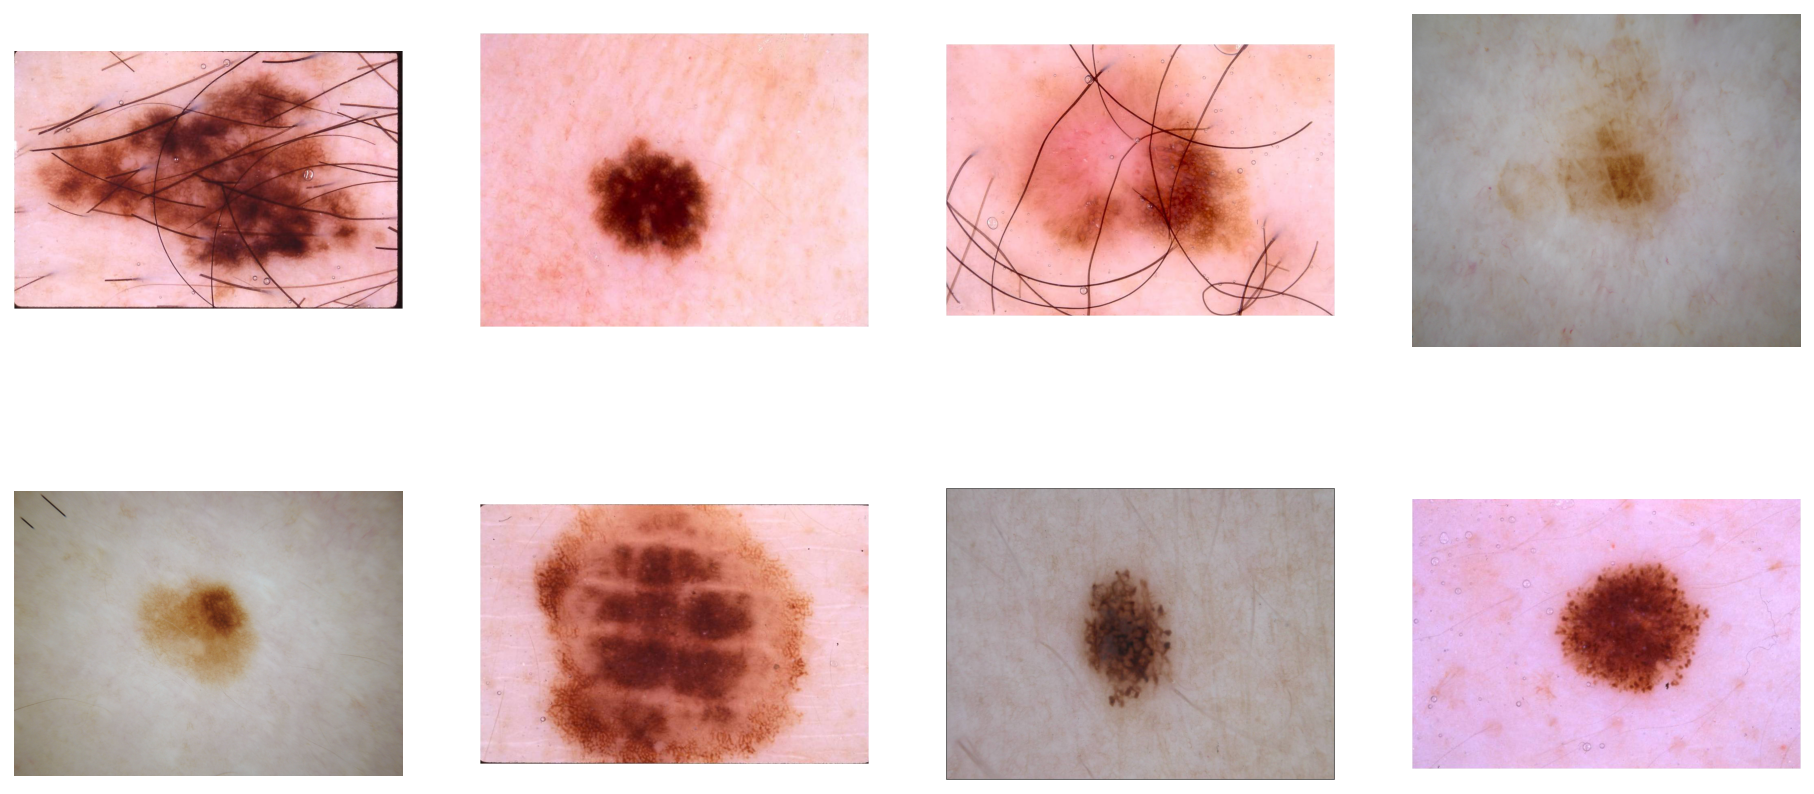

In [50]:
show_img("Melanoma",Melanoma)

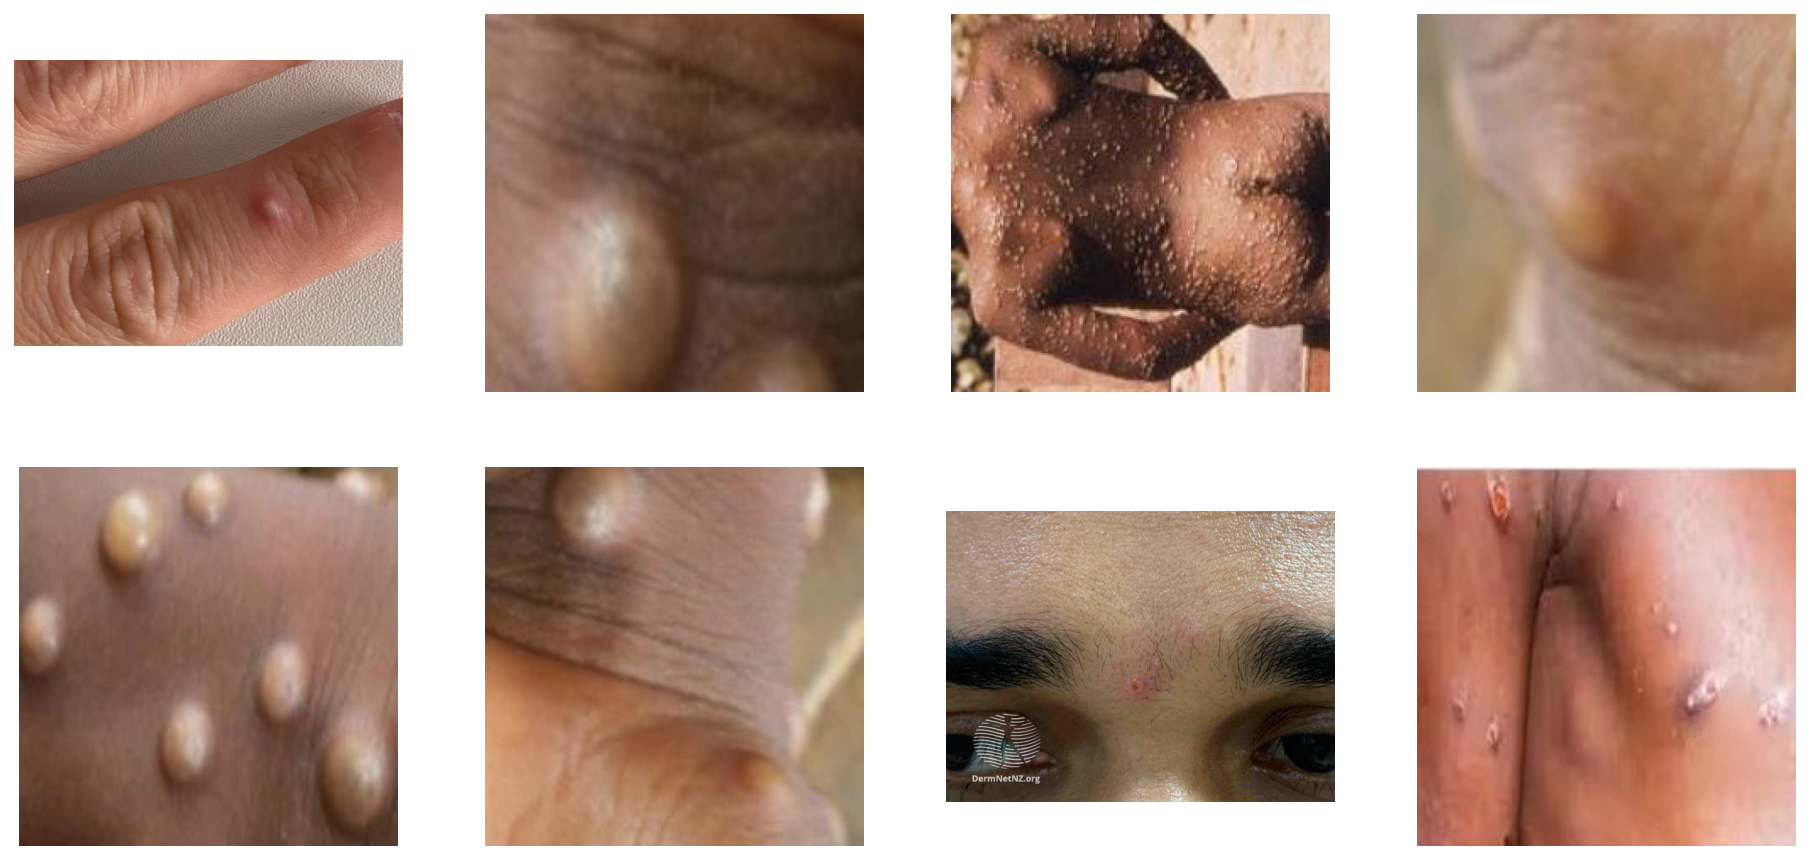

In [51]:
show_img("MonkeyFox",MonkeyFox)

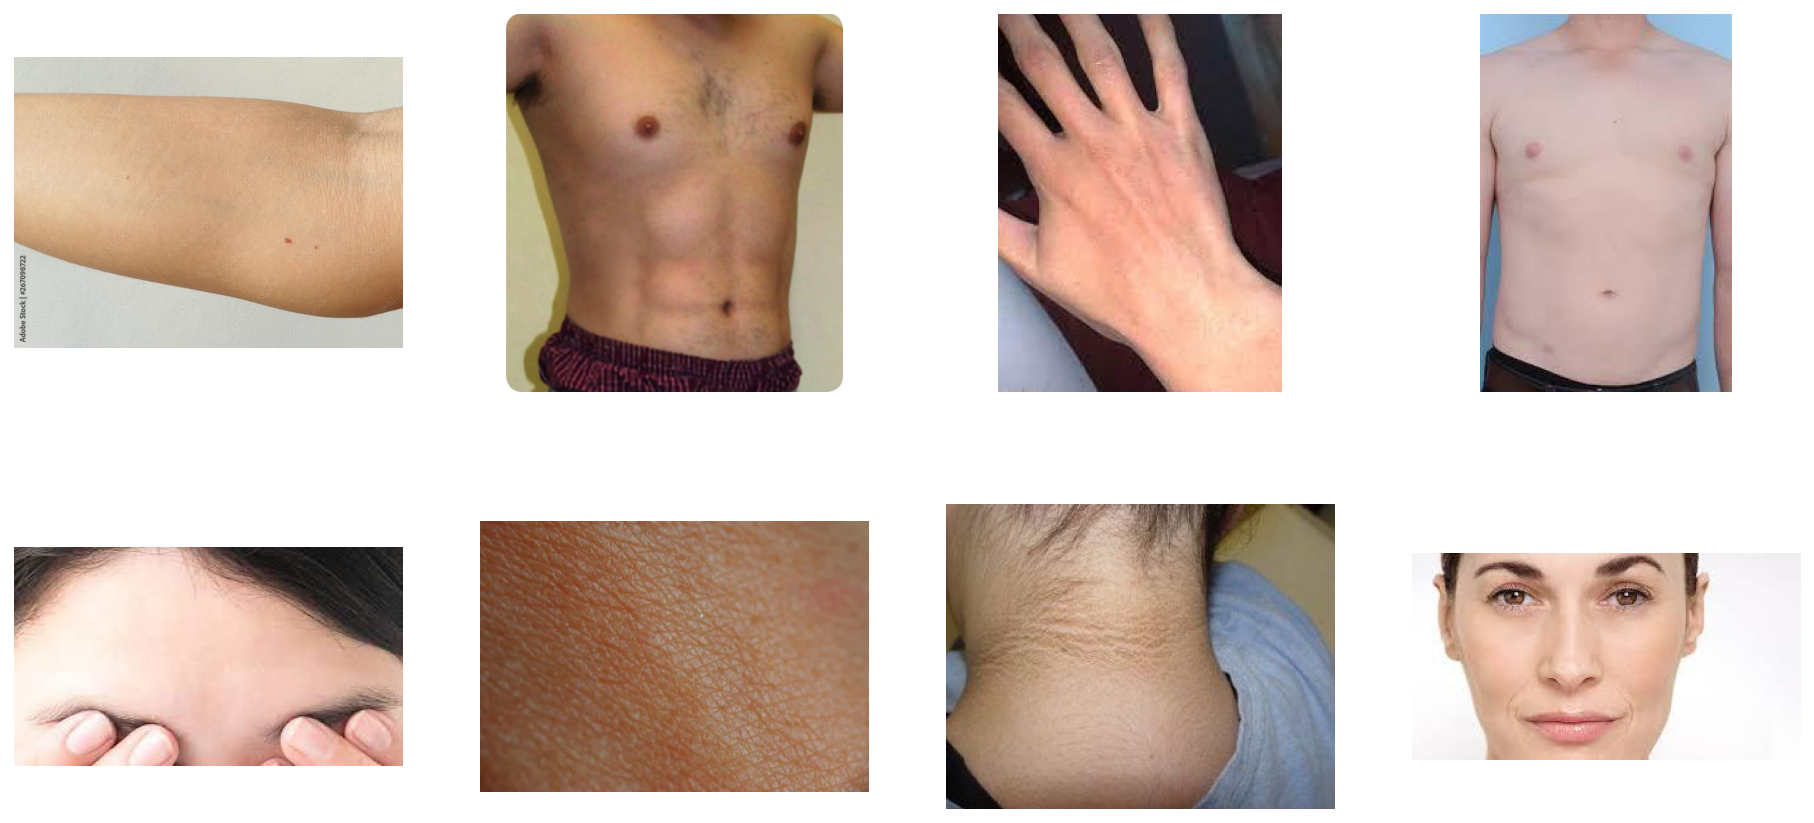

In [52]:
show_img("NormalSkin",NormalSkin)


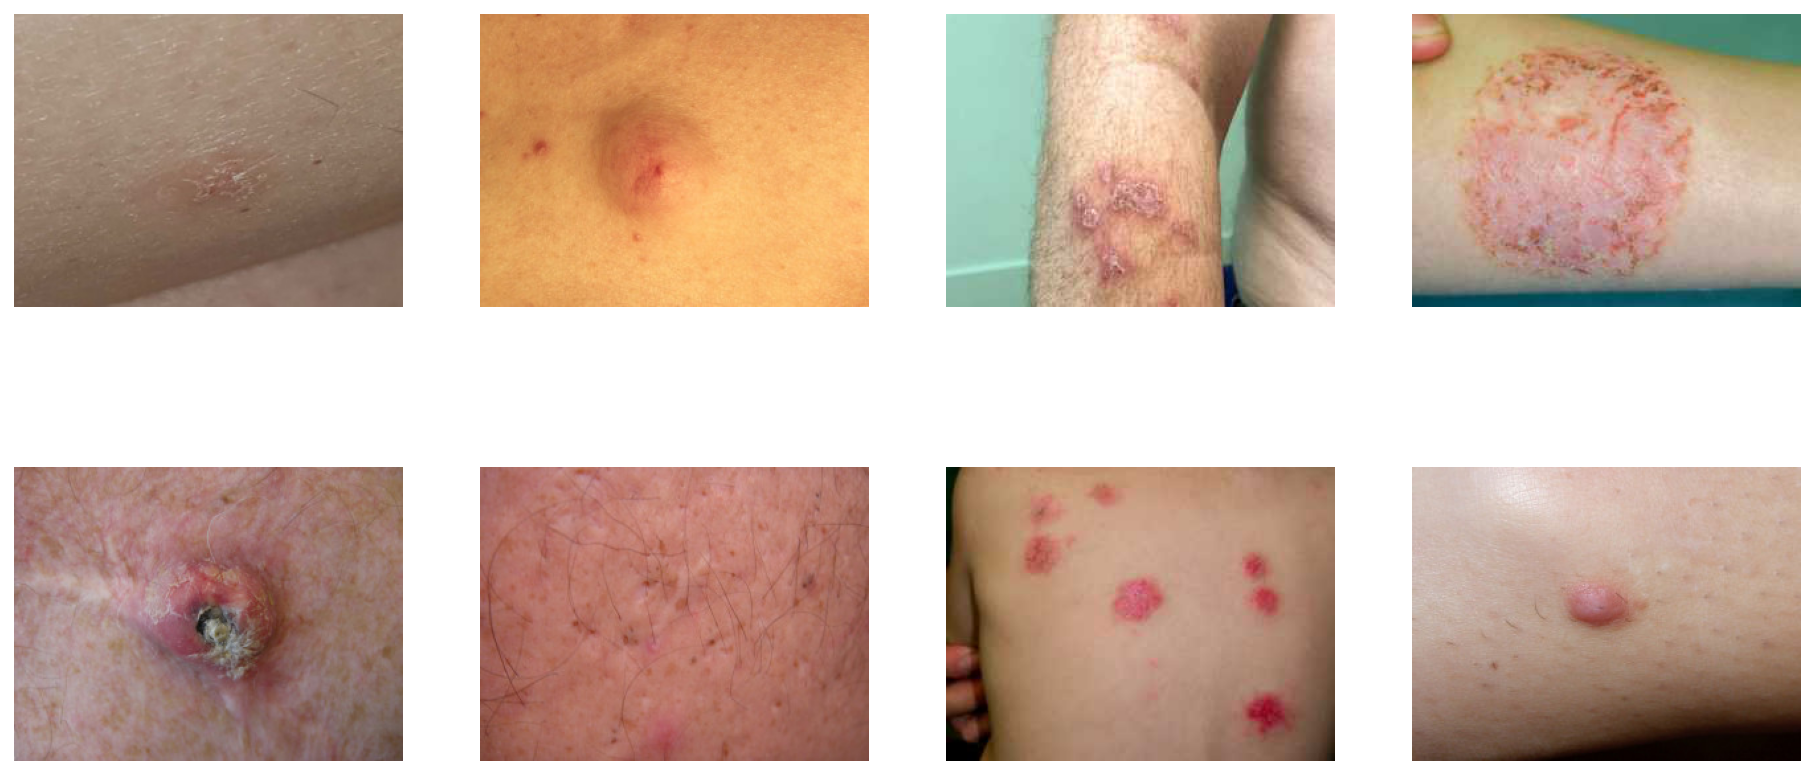

In [53]:
show_img("Other",Other)